In [12]:
path = "../data/"
csvfile = "Pdu_biofilm_initial_experiment.csv"

#import pandas
import pandas as pd
# import matplotlib
import matplotlib
import matplotlib.pyplot as plt

# import seaborn
import seaborn as sns
%matplotlib inline
df = pd.read_csv(path+csvfile)
print(df)
df.head()
df.info()

     age  time_after_induction           Treatment  crawl_coverslip  \
0   3.50                    12             Biofilm                8   
1   3.50                    12             Biofilm               12   
2   3.50                    12             Biofilm                5   
3   3.50                    12  No biofilm control                0   
4   3.50                    12  No biofilm control                0   
5   3.50                    12  No biofilm control                0   
6   4.00                    24             Biofilm               18   
7   4.00                    24             Biofilm               15   
8   4.00                    24             Biofilm               16   
9   4.00                    24  No biofilm control                1   
10  4.00                    24  No biofilm control                3   
11  4.00                    24  No biofilm control                3   
12  4.50                    36             Biofilm               24   
13  4.

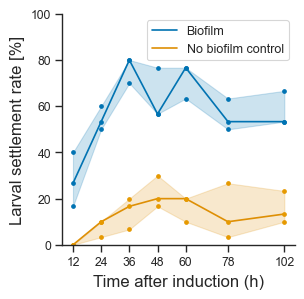

In [13]:
import numpy as np
#Timeseries plot with error bands
sns.set(font="Arial")
sns.set_style("ticks")
sns.set_context("paper", font_scale = 1)
sns.set_palette("colorblind")

# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(3, 3))

#Plot median percent settlement for different times in adult box biofilm vs negative control. Line shadow = 95% confidence interval
fig1a = sns.lineplot(x="time_after_induction", y="%_crawl_coverslip", estimator=np.median, hue="Treatment", data=df)

#Remove top and right bounding lines
sns.despine()

#Make y-axis range 0 to 100
fig1a.set_ylim(0, 100)

#Set points for x axis
fig1a.set_xticks([12, 24, 36, 48, 60, 78, 102])

#Set x and y axis labels
plt.xlabel("Time after induction (h)", fontsize=12)
plt.ylabel("Larval settlement rate [%]", fontsize=12)

#Add scatter plot on top of line plot, identify different groups and assign them a colour
mask = df["Treatment"] == "Biofilm"
biofilm = df["%_crawl_coverslip"][mask]
time = df["time_after_induction"][mask]
mask = df["Treatment"] == "No biofilm control"
nobiofilm = df["%_crawl_coverslip"][mask]
plt.plot(time, biofilm, '.', color=(0,0.45,0.7))
plt.plot(time, nobiofilm, '.', color=(0.9,0.6,0))

#Move figure legend to upper right, change font size so legend doesn't cover line
fig1a.legend(fontsize=9, loc='upper right')

#Export graph to an svg file for use in figure 
plt.savefig("../output/Exeter_LSI_Data_2018-2020/fig1a.svg", bbox_inches='tight')

In [14]:
#Run a Shapiro-Wilks test on data to check distribution
#import libraries needed
import numpy as np
from scipy.stats import shapiro
from numpy.random import random

#Conduct the Shapiro-Wilk Test
shapiro(df["%_crawl_coverslip"])
#The test rejects the hypothesis of normality when the p-value is less than or equal to 0.05. We can state with 95% confidence that the data does NOT fit the normal distribution. 

ShapiroResult(statistic=0.9034085273742676, pvalue=0.0018236105097457767)

In [15]:
#As data is not normally distributed, we will do a Kruskal-Wallis test, to check for significant different between control and 
#Here is an explainer for different types of non-parametric tests: https://users.sussex.ac.uk/~grahamh/RM1web/sthand7.pdf
mask = df["Treatment"] == "Biofilm"
#print(df["%_crawl_coverslip"][mask])
biofilm = df["%_crawl_coverslip"][mask]
time = df["time_after_induction"][mask]

#do Kruskal-Wallis Test to check if significant difference. Shapiro-Wilks test suggests data is not normally distributed.
import scipy.stats as stats

stats.kruskal(df["%_crawl_coverslip"][df["Treatment"] == "Biofilm"],
               df["%_crawl_coverslip"][df["Treatment"] == "No biofilm control"])

KruskalResult(statistic=28.306424287536384, pvalue=1.0355175213601036e-07)

<Axes: >

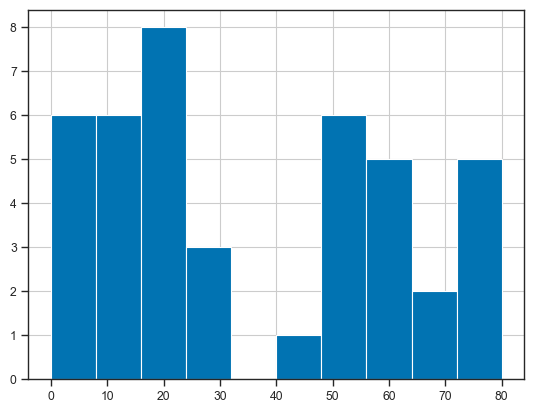

In [16]:
#Check histogram of %_crawl_coverslip for data distribution
df['%_crawl_coverslip'].hist()